In [1]:
#Introduction to Types and Generic Programming
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")
using LinearAlgebra, Statistics

Activated /Users/Shane/Dropbox/GitHub/quantecon-notebooks-julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using Base: show_supertypes  # import the function from the `Base` package

@show show_supertypes(Vector{Float64})

c = [1.0, 2.0, 3.0]


subtypes(AbstractVecOrMat{<:Real});


Array{Float64,1} <: DenseArray{Float64,1} <: AbstractArray{Float64,1} <: Anyshow_supertypes(Vector{Float64}) = nothing


In [3]:
# Deducing and declaring types

x1 = [1, 2, 3]
x2 = [1.0, 2.0, 3.0]

@show typeof(x1)
@show typeof(x2);

f(y) = 2y # define some function


x = [1 2 3]
@show typeof(x)
z = f(x) # call with an integer array - compiler deduces type


typeof(x1) = Array{Int64,1}
typeof(x2) = Array{Float64,1}
typeof(x) = Array{Int64,2}


1×3 Array{Int64,2}:
 2  4  6

In [353]:
# bad - we want type stability

function f(x)
    if x > 0
        return 1.0
    else
        return 0 # probably meant `0.0`
    end
end

@show typeof(f(1))
@show typeof(f(-1));


typeof(f(1)) = Float64
typeof(f(-1)) = Int64


In [8]:
# creation of data types using struct

struct FooNotTyped # immutable by default, use `mutable struct` otherwise
    a # BAD! not typed
    b
    c
end

# add structure where types are chosen

struct Foo
    a::Float64
    b::Int64
    c::Vector{Float64}
end



In [6]:
foo_nt = FooNotTyped(2.0, 3, [1.0, 2.0, 3.0])  # new `FooNotTyped`
foo = Foo(2.0, 3, [1.0, 2.0, 3.0]) # creates a new `Foo`

@show typeof(foo)
@show foo.a       # get the value for a field
@show foo.b
@show foo.c;

@show typeof(foo.a)
@show typeof(foo.b)

# foo.a = 2.0     # fails since it is immutable

typeof(foo) = Foo
foo.a = 2.0
foo.b = 3
foo.c = [1.0, 2.0, 3.0]
typeof(foo.a) = Float64
typeof(foo.b) = Int64


Int64

In [9]:
f(x) = x.a + x.b + sum(x.c) # use the type
a = 2.0
b = 3
c = [1.0, 2.0, 3.0]
foo = Foo(a, b, c)
@show f(foo)   # call with the foo, no problem

# some other typed for the values
a = 2   # not a floating point but `f()` would work
b = 3
c = [1.0, 2.0, 3.0]'   # transpose is not a `Vector` but `f()` would work
# foo = Foo(a, b, c)   # fails to compile

# works with `NotTyped` version, but low performance
foo_nt = FooNotTyped(a, b, c)
@show f(foo_nt);

f(foo) = 11.0
f(foo_nt) = 11.0


In [10]:
struct Foo3{T1, T2, T3}
    a::T1   # could be any type
    b::T2
    c::T3
end

# works fine
a = 2
b = 3
c = [1.0, 2.0, 3.0]'    # transpose is not a `Vector` but `f()` would work
foo = Foo3(a, b, c)
@show typeof(foo)
f(foo)



typeof(foo) = Foo3{Int64,Int64,Adjoint{Float64,Array{Float64,1}}}


11.0

In [11]:
a = 2
b = 3
c = [1.0, 2.0, 3.0]' 

struct Foo4{T1 <: Real, T2 <: Real , T3<:AbstractVecOrMat{<:Real} }
    a::T1
    b::T2
    c::T3
end
foo = Foo4(a,b,c) # no problem and high performance


Foo4{Int64,Int64,Adjoint{Float64,Array{Float64,1}}}(2, 3, [1.0 2.0 3.0])

In [12]:
using Parameters # create named tuples with defaults using @with_kw

@with_kw  struct Foo5
    a::Float64 = 2.0     # adds default value
    b::Int64
    c::Vector{Float64}
end

foo = Foo5(a = 0.1, b = 2, c = [1.0, 2.0, 3.0])
foo2 = Foo5(c = [1.0, 2.0, 3.0], b = 2)  # rearrange order, uses default values

@show foo
@show foo2

function f(x)
    @unpack a, b, c = x     # can use `@unpack` on any struct
    return a + b + sum(c)
end

f(foo)

foo = Foo5
  a: Float64 0.1
  b: Int64 2
  c: Array{Float64}((3,)) [1.0, 2.0, 3.0]

foo2 = Foo5
  a: Float64 2.0
  b: Int64 2
  c: Array{Float64}((3,)) [1.0, 2.0, 3.0]



8.1

In [17]:
# BAD

x = [5.0, 6.0, 2.1]

function g(x::Array{Float64,1}) # not generic
    y = zeros(length(x))   # not generic, hidden float!
    z = Diagonal(ones(length(x)))  # not generic, hidden float!
    q = ones(length(x))
    y .= z * x + q
    return y
end

# GOOD

function g2(x)
    y = similar(x)
    z = I
    q = ones(eltype(x),length(x))
    y .= z * x +q
    return y
end

g2(x)

3-element Array{Float64,1}:
 6.0
 7.0
 3.1

In [20]:
supertypes(BigInt)

(BigInt, Signed, Integer, Real, Number, Any)

In [22]:
function g(x)
    y = similar(x)
    for i in eachindex(x)
        y[i] = x[i]^2      # could broadcast
    end
    return y
end

g([Int(1), Int(2)])

2-element Array{Int64,1}:
 1
 4

In [27]:
x = [5.0, 6.0, 2.1]
typeof(one(BigFloat(2)))

BigFloat

typeof(x) = StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
typeof(x_2) = StepRange{Int64,Int64}
supertypes(typeof(x)) = (StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, AbstractRange{Float64}, AbstractArray{Float64,1}, Any)


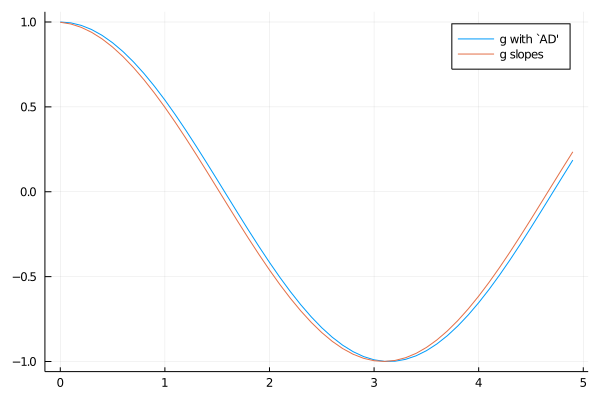

In [56]:
x = range(0.0, 1.0, length = 20)
x_2 = 1:1:20   # if integers

@show typeof(x)
@show typeof(x_2)
@show supertypes(typeof(x));

f(x) = x^2
f_x = f.(x) 

slopes(f_x::AbstractVector, x::AbstractRange) = diff(f_x)/step(x)

f_slopes = slopes(f_x,x)

using Plots, ForwardDiff
gr(fmt = :png);

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f,x)

# compare slopes with sine curve
g(x) = sin(x)
x = 0:0.1:5
g_x = g.(x)

g_slopes = slopes(g_x,x) #hand-made slopes function
D_g_x = D(g).(x) #use forward diff functional

plot(x[1:end-1],D_g_x[1:end-1],label = "g with `AD'")
plot!(x[1:end-1],g_slopes,label = "g slopes")

#



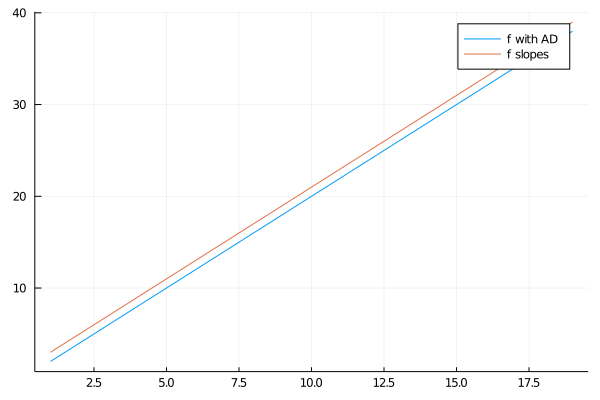

In [61]:
# compare slopes of f(x) using 
x_2 = 1:1:20   # if integers

f(x) = x^2
f_x = f.(x_2)

D_f_x = D(f).(x_2)
f_slopes = slopes(f_x,x_2)

plot(x_2[1:end-1],D_f_x[1:end-1],label = "f with AD")
plot!(x_2[1:end-1],f_slopes,label = "f slopes")

In [72]:
# try a different version where we pass a function instead of an abstract array

slopes2(f::Function, x::AbstractRange) = diff(f.(x))/step(x)

q(x) = sin(x)
@show typeof(q) <: Function
@show typeof(x) <: AbstractArray
q_slopes2 = slopes2(q,x);

# Finally, if x was an AbstractArray and not an AbstractRange we can no longer use a uniform step.

slopes3(f::Function, x::AbstractArray) = diff(f.(x))./diff(x)

x_array = Array(x)
@show typeof(x_array) <: AbstractArray
q_slopes3 = slopes3(q,x_array)


typeof(q) <: Function = true
typeof(x) <: AbstractArray = true
typeof(x_array) <: AbstractArray = true


50-element Array{Float64,1}:
  0.9983341664682815
  0.9883591414823306
  0.9685087586627835
  0.9389813564731094
  0.900071962955525
  0.8521693479083239
  0.7957521384265567
  0.7313840366183171
  0.6597081872796063
  0.581440751804131
  0.49736375253538867
  0.4083172590579093
  0.3151909944996664
  ⋮
 -0.7590826824125478
 -0.6903633612395437
 -0.6147461575648228
 -0.5329866134917765
 -0.4459016433586687
 -0.3543613714006103
 -0.25928043775580983
 -0.16160885968367458
 -0.06232253930636389
  0.03758648728260163
  0.13711996211508132
  0.23528337961194107

In [86]:
# Exercise 1

using LinearAlgebra
using StaticArrays
using BenchmarkTools

N = 3
A = rand(N, N)
x = rand(N)

@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)

# Benchmark

A_s = @SMatrix rand(N,N)
x_s =  @SVector rand(N)

@btime  $A_s * $x_s
@btime inv($A_s);



  109.798 ns (1 allocation: 112 bytes)
  770.738 ns (4 allocations: 1.95 KiB)
  0.028 ns (0 allocations: 0 bytes)
  11.234 ns (0 allocations: 0 bytes)


In [98]:
# very fast matrix multiplication, use $ and denote as static vectors
@btime $A_s * $x_s
@show supertypes(typeof(A_s))
@show supertypes(typeof(A));

  0.029 ns (0 allocations: 0 bytes)
supertypes(typeof(A_s)) = (SArray{Tuple{3,3},Float64,2,9}, StaticArray{Tuple{3,3},Float64,2}, AbstractArray{Float64,2}, Any)
supertypes(typeof(A)) = (Array{Float64,2}, DenseArray{Float64,2}, AbstractArray{Float64,2}, Any)


In [104]:
# Exercise 2

Σ = [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

# Benchmark

Σ_s = @SMatrix [0.4  0.3; 0.3  0.45]
R_s = 0.5 * Σ_s

@show typeof(R) #static array, too

@btime gain($Σ_s, $G, $R_s);




  955.231 ns (9 allocations: 1.91 KiB)
typeof(R) = Array{Float64,2}
  0.029 ns (0 allocations: 0 bytes)


p = Polynomial(2 - 5*x + 2*x^2)
typeof(p) = Polynomial{Int64}
(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]


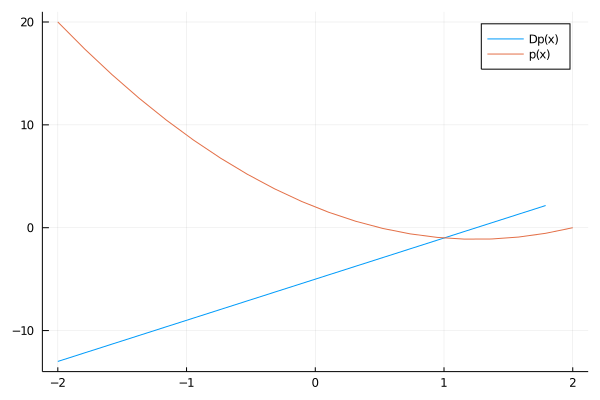

In [112]:
# Exercise 3

using Polynomials

p = Polynomial([2, -5, 2], :x)  # :x just gives a symbol for display

@show p
@show typeof(p)
p′ = derivative(p)   # gives the derivative of p, another polynomial
@show p(0.1), p′(0.1)  # call like a function
@show roots(p);   # find roots such that p(x) = 0

# plot p and p'

r = range(-2.0, 2.0, length = 20)

p_r = p.(r)
p′_r = p′.(r)

plot(r[1:end-1],p′_r[1:end-1],label="Dp(x)")
plot!(r,p_r,label="p(x)")


In [117]:
# Exercise 4

function newtonsmethod(p::Polynomial, x_0; tolerance = 1E-7, maxiter = 100)
    
    p′ = derivative(p)
    
    #initialise loop
    iter = 1
    normdiff = Inf
    x_old = x_0
    
    while normdiff > tolerance && iter < maxiter
        
        x_new = x_old - p(x_old)/ p′(x_old)
        normdiff = norm(x_new - x_old)
        
        iter += 1 #continuation
        x_old = x_new
    end
    return (root = x_old, normdiff = normdiff, iter = iter )
end

# Compute roots

p = Polynomial([2, -5, 2], :x)  # :x just gives a symbol for display

@show newtonsmethod(p, 5);   # find roots such that p(x) = 0 
@show roots(p)
@btime newtonsmethod(p, 5);  
@btime roots(p);   



newtonsmethod(p, 5) = (root = 2.0, normdiff = 8.058442801939236e-12, iter = 8)
roots(p) = [0.5, 2.0]
  1.101 μs (44 allocations: 1.09 KiB)
  1.849 μs (18 allocations: 2.14 KiB)


In [382]:
# Exercise 5
function trapezoidal(f::AbstractArray{Float64,1}, x::AbstractArray{Float64,1})
    sol = similar(x)
    del = diff(x)
    for i in 2:length(x)
        sol[i] = (f_x[i]+f_x[i-1])/2*del[i-1]
    end
    return sum(sol)
end

x = range(0.0,1.0,length=9)
f(x) = x^2
f_x = f.(x)


int = trapezoidal(f_x,x)


0.3359375

In [405]:
function trapezoidal2(f::AbstractArray{Float64}, x::AbstractRange{Float64})
    sol = similar(x)
    del = step(x)
    for i in 2:length(x)
        sol[i] = (f_x[i]+ f_x[i-1])/2*del
    end
    return sum(sol)
end

x = range(0.0,1.0,length=1100)
f(x) = x^2
f_x = f.(x)

integral = trapezoidal2(f_x,x)


NaN

In [408]:
f(x) = x^3
x̄ = 1.0
x̲ = 0.0
N = 1100;

function trapezoidal3(f, x̲::Real , x̄::Real , N::Int64)
    x = range(x̲, x̄, length = N)
    f_x = f.(x)
    
    #implementation the same as trapezodal2
    sol = similar(x)
    del = step(x)
    for i in 2:length(x)
        sol[i] = (f_x[i]+ f_x[i-1])/2*del
    end
    return sum(sol)
end

integral = trapezoidal3(f ,x̲ , x̄ , N)


0.2500002069877405

In [411]:
# Exercise 6

using ForwardDiff

function f(a, b; N::Int64 = 50)
    r = range(a, b, length=N) # one
return mean(r)
end

Df(x) = ForwardDiff.derivative(y -> f(0.0, y), x)

@show f(0.0, 3.0)
@show f(0.0, 3.1)

Df(3.0)


f(0.0, 3.0) = 1.5
f(0.0, 3.1) = 1.55


0.5

In [413]:
function f(a, b; N::Int64 = 50)
    r = range(a, b, length=N) # one
return mean(r)
end



1.5